# Шаг 1 Изучение информации
Интернет-магазин «Стримчик» по всему миру продаёт компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import string
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns 

data = pd.read_csv('/datasets/games.csv')
data.columns = [col.lower() for col in data.columns] # Названия столбцов приведем к нижнему регистру

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [6]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [7]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

## Шаг 1 Вывод
**name** - есть пропуск, также стоит преобразовать к одному регистру и поискать дубли<br>
**platform** - нет проблем <br>
**year_of_release** - имеются пропуски, тип данных можно перевести в Даты <br>
**genre** - есть пара пропусков <br>
**na_sales**,	**eu_sales**,	**jp_sales**,	**other_sales** - нет проблем <br>
**critic_score** - есть пропуски<br>
**user_score** - есть пропуски и нужно преобразовать в вещественный тип данных<br>
**rating** - етсь пропуски

<hr>

# Шаг 2 Подготовка данных


## Шаг 2.1  Удаление пропусков и преобразование данных 

Удалим пропуски в столбце **year_of_release** и преобрузаем в целочисленный тип

In [8]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
print("Пропусков в столбце year_of_release:", len(data[data['year_of_release'].isnull()]))
print("Доля попусков в столбце year_of_release:", round(len(data[data['year_of_release'].isnull()])/len(data) * 100, 2), "%")

Пропусков в столбце year_of_release: 269
Доля попусков в столбце year_of_release: 1.61 %


Пропуски годов нельзя заполнить средним, медианным или каким-либо другим значением. Их немного поэтому лучше удалить.

In [10]:
data = data[data['year_of_release'].notnull()]
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format="%Y").dt.year
len(data[data['year_of_release'].isnull()])

0

<hr>

Пропуски в **genre**

In [11]:
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Почти все поля в этих строках пропущены. Лучше удалить эти строки

In [12]:
data = data[data['genre'].notnull()]
len(data[data['genre'].isnull()])

0

<hr>

Пропуски в **critic_score**, **user_score**

In [13]:
data[data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Пропусков досточно много. Удалять их не стоит. **user_score** надо преобразовать в тип float, но сначала разобраться со значением **tbd**. Эта аббревиатура переводится как "To Be Determined" - "будет определено". Наверное можно заменить на NaN.

In [16]:
data['user_score'] = data['user_score'].apply(lambda val: float('NaN') if val == 'tbd' else val).astype('float')
print(len(data[data['user_score'] == 'tbd']))
data.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<hr>

Рассмотрим **rating**:

In [17]:
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В **rating** также слишком много пропусков и заменить каким-то значением по-умолчанию не получится.

<hr>

## Шаг 2.1 Вывод
Были удалены записи с небольшим количеством пропусков (**year_of_release**, **name** и **genre**). <br>
Пропуски в столбцах с оценкой игр оставили (**critic_score**, **user_score**, **rating**): их слишком много для удаления, а замену не стоит делать, т.к. это может сказаться на дальнейшем анализе <br>
Преобразовали тип данных в столбцах: **year_of_release** в DateTime, **user_score** в float. <br>

<hr>

Пропуски в **name**, **genre** обусловлены какой-то программной ошибкой, т.к. в записях с этими полями почти все другие поля тоже отсутствуют. <br>
Пропуски в **year_of_release**, **other_sales**, **critic_score**, **user_score**, **rating** вероятно появились при сборе информации, хотя информация есть в интернете (wikipedia, Metacritic).<br>
В идеале данные можно попробовать собрать/спарсить еще раз, но сейчас оставим как есть<br>

<hr>

## Шаг 2.2 Суммарная продажа по регионам

Добавим столб с общей суммой продаж по всем регионам

In [18]:
data['sum_sales'] = data.apply(lambda row: row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales'], axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<hr>

## Шаг 2.3 Проверка на дубли

In [19]:
data.duplicated().sum()

0

## Шаг 2 Вывод
Преобразовали в некоторых столбцах типы данных.<br> 
Некоторые пропуски удалили, но большую часть оставили и не заменяли, т.к. их много и в ддальнейшем замена могла бы повлиять на анализ данных.<br>
Дубликатов найдено не было<br>
Добавил столбец с общей суммой продаж

<hr>

# Шаг 3 Исследовательский анализ данных


## Шаг 3.1 Количество игр в год

In [20]:
game_per_year = data.groupby('year_of_release')['name'].count()
game_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

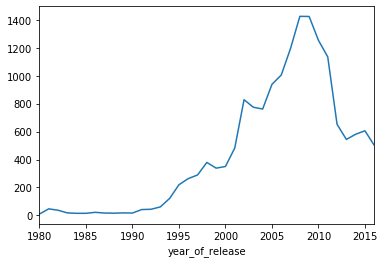

In [21]:
game_per_year.plot()

Сверху учитывался все записи из датасета, т.е. и те игры, которые выходили на разные платформы. Теперь взглянем только на уникальные игры

In [22]:
uniq_name = data.drop_duplicates(subset='name')
game_per_year = uniq_name.groupby('year_of_release')['name'].count()
game_per_year

year_of_release
1980      8
1981     43
1982     33
1983     16
1984     13
1985     13
1986     21
1987     15
1988     11
1989     14
1990     14
1991     40
1992     37
1993     58
1994    112
1995    200
1996    247
1997    268
1998    347
1999    293
2000    300
2001    410
2002    573
2003    491
2004    521
2005    617
2006    729
2007    838
2008    987
2009    957
2010    862
2011    750
2012    406
2013    293
2014    279
2015    331
2016    279
Name: name, dtype: int64

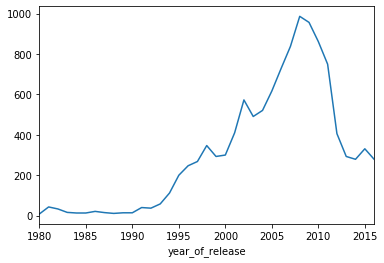

In [23]:
game_per_year.plot()

## Шаг 3.1 Вывод
Начиная с 1994 начался росто выпуска игра, а с 2002  по 2009 был еще более резкий скачок, а потом спад. В качестве актуального периода стоит взять с 1994 по 2016 года. Пик был в 2008 году. <br>
Также взглянули только на уникальные игры: собственно график по форме почти совпадает с графиком по всему датасету и выводы остаются те же.

<hr>

## Шаг 3.2 Продажа по платформам
Посмотрим сумму продаж по платформам начиная с 1994 года

In [24]:
platform_data = data.pivot_table(
                        index='year_of_release', 
                        columns='platform',
                        values='sum_sales', 
                        aggfunc='sum',
                        fill_value=0,
                        margins=True
                )
platform_data = platform_data.drop(columns='All')
cm = sns.light_palette("green", as_cmap=True)
s = platform_data.style.background_gradient(cmap=cm)
s

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,35.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,28.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,5.84,0,0,0,0,0,0,0,0,0,0,10.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,0.27,0,0,0,0,0,0,0,0,0,0,50.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,0.45,0,0,0,0.02,0,0,0,0,0,0,53.44,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,0.67,0,0,0,0,0,0,0,0,0,0,36.41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,1.94,0,0,0,0,0,0,0,0,0,0,19.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,0.74,0,0,0,0,1.43,0,0,0,0,0,45.01,0,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Оставим платформы с суммарной продаже больше 159 млн. долларов

In [25]:
platform_data = platform_data.drop(columns=platform_data.loc['All', ~(platform_data > 159).any()].index)
cm = sns.light_palette("green", as_cmap=True)
s = platform_data[:-1].style.background_gradient(cmap=cm)
s

platform,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
1980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,0,0,0,0,0,0,10.96,0,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,50.08,0,0,0,0,0,0,0,0,0,0,0
1985,0,0.02,0,0,0,0,53.44,0.04,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,36.41,0,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,19.76,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,1.43,0,0,0,45.01,0.03,0,0,0,0,0,0,0,0,0,0


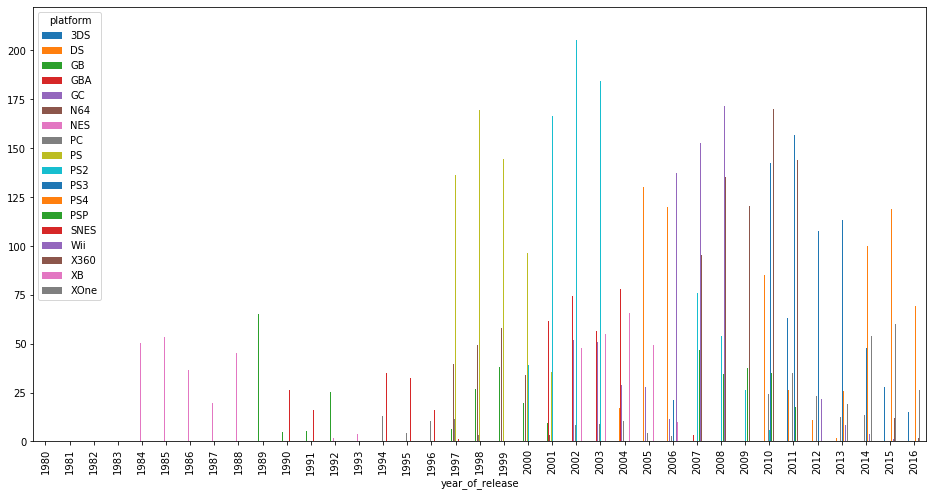

In [26]:
platform_data[:-1].plot(kind='bar', figsize=(16, 8))

## Шаг 3.2 Вывод

Во всех платформах, кроме PC, продажи идут около 5-7 лет. Очевидно, связано с тем, что выходит новое поколоение этой платформы, например (PS,PS2, PS3, PS4)<br>
На данный момент можно выделить 3 актуальные платформы: PC, XOne, PS4. Второстепенные, но еще продаваемые, это: PS3, 3DS, X360.<br>
PC не вырывается в лидеры, но с 1994 не скатывается до нуля. <br>
Также следует отметить сильный спад в 2016 год, предположительно это связано не с самими продажами, а с актуальностью собранной информации

<hr>

## Шаг 3.3 Выбор актуального периода

Актуальным периодом берем с 2010 по 2016, т.к. в 2010 был пик продаж для платформ PS3, 3DS, X360, которые еще актуальны на 2016 год, и с 2013 уже начали появляться платформы последнего поколения.

In [27]:
data_actual = data[data['year_of_release'] >= 2010]
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16714
Data columns (total 12 columns):
name               5277 non-null object
platform           5277 non-null object
year_of_release    5277 non-null int64
genre              5277 non-null object
na_sales           5277 non-null float64
eu_sales           5277 non-null float64
jp_sales           5277 non-null float64
other_sales        5277 non-null float64
critic_score       2312 non-null float64
user_score         2499 non-null float64
rating             3113 non-null object
sum_sales          5277 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 535.9+ KB


<hr>

## Шаг 3.4 Лидирующие платформы

Согласно предыдущим анализам данных, прибыльными платформами являются XOne и PS4. Менее прибыльные, т.е. продажи которых уже падают: PS3, 3DS, X360. У PC продажи не такие большие, но они не падают.

In [28]:
platform_list = ['XOne', 'PS4', 'PS3', '3DS', 'X360', 'PC']
data_actual = data_actual[data_actual['platform'].isin(platform_list)]
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


<hr>

## Шаг 3.5 «ящик с усами» по глобальным продажам каждой игры


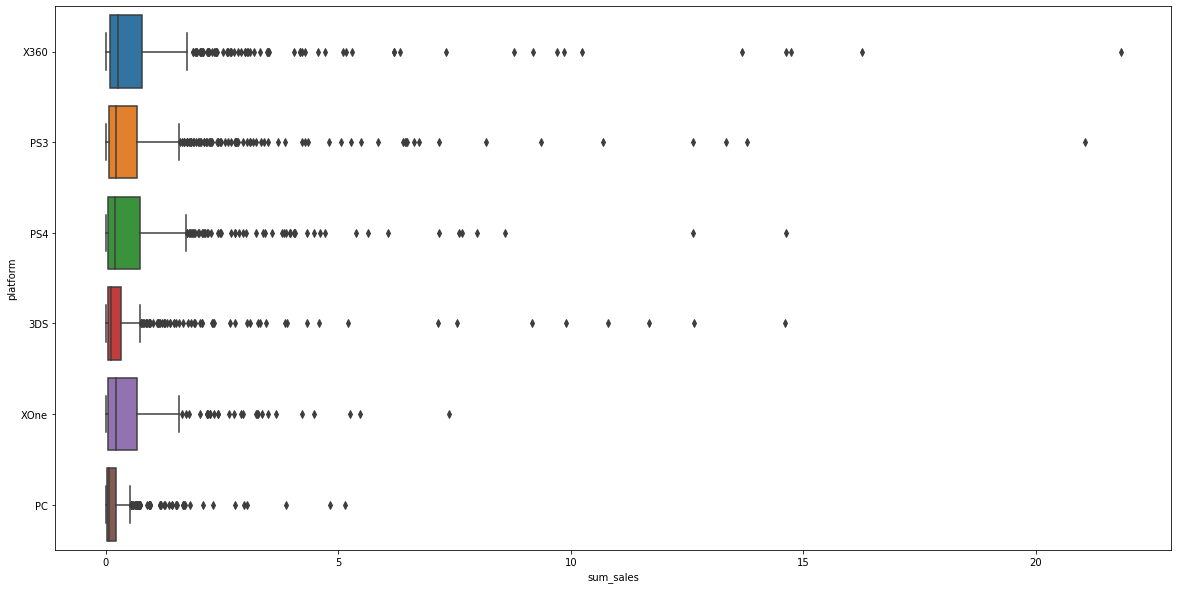

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(y="platform", x="sum_sales", data=data_actual, orient="h")

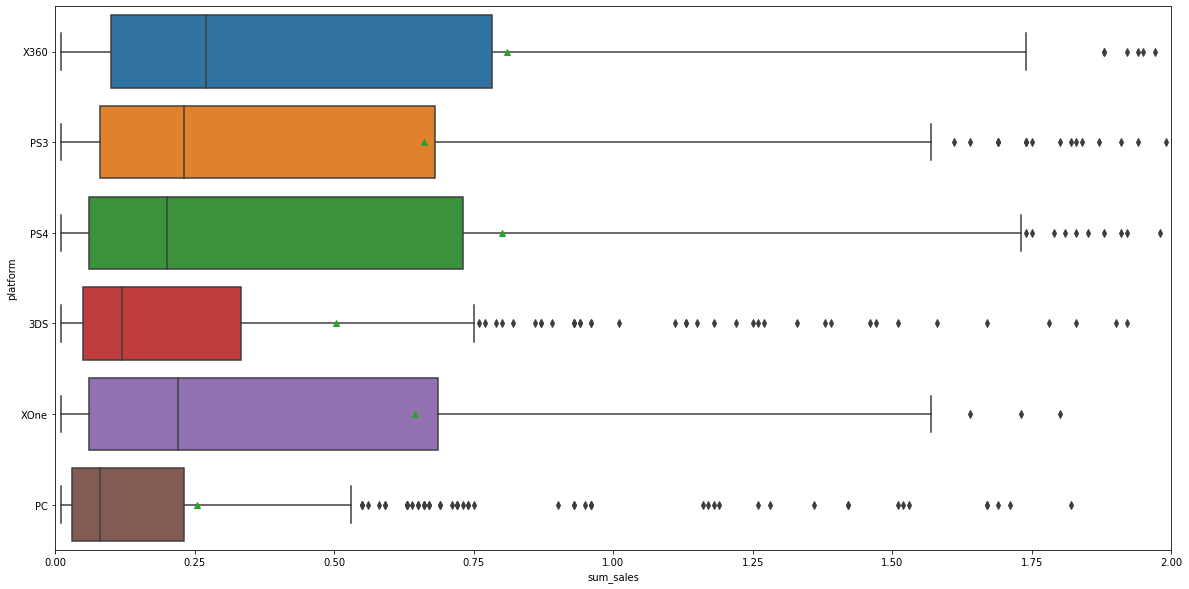

In [30]:
plt.figure(figsize=(20,10))
plt.xlim(0, 2)
sns.boxplot(y="platform", x="sum_sales", data=data_actual, orient="h",showmeans=True)

In [31]:
for pf in platform_list:
    print('Среднее для {}: \t{}'.format(pf, round(data_actual[data_actual['platform']==pf]['sum_sales'].mean(), 3)))

Среднее для XOne: 	0.645
Среднее для PS4: 	0.801
Среднее для PS3: 	0.661
Среднее для 3DS: 	0.504
Среднее для X360: 	0.809
Среднее для PC: 	0.255


## Шаг 3.5 Вывод
По диаграмме видно, что продажи X360, XOne, PS3 и PS4 почти совпадают. 3DS имеет меньшее значение продаж, и самое маленькое значение у PC.<br>
Среднее значение продаж разнится сильнее, но все равно X360, XOne, PS3 и PS4 почти равны, а 3DS и PC отстают. <br>
PS4 можно назвать лидирующей платформой, т.к. она относится к последнему поколению консолей и имеет более высокий 75% процентиль по сравнению с XOne.

<hr>

## Шаг 3.6 Анализ влияния отзывов в популярной платформе

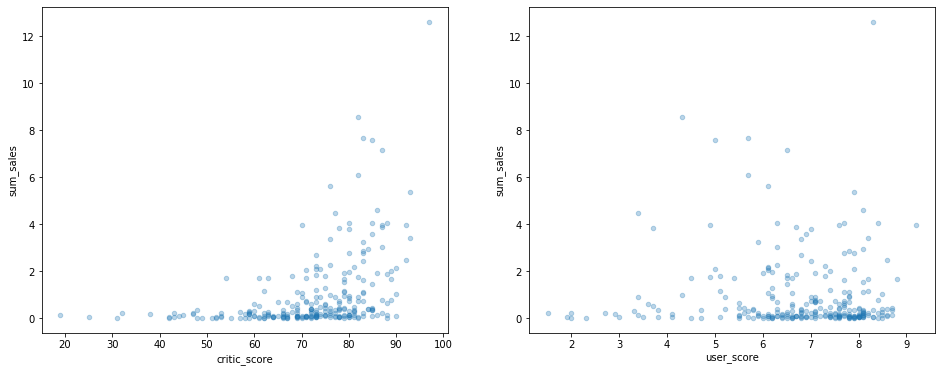

In [32]:
top_pf_data = data_actual[data_actual['platform'] == 'PS4']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_pf_data.plot(kind='scatter', y='sum_sales', x='critic_score', ax=axes[0], alpha=0.3)
top_pf_data.plot(kind='scatter', y='sum_sales', x='user_score', ax=axes[1], alpha=0.3)

In [33]:
print('Коррелляция между продажами и оценками критиков: \t', round(top_pf_data['sum_sales'].corr(top_pf_data['critic_score']), 3))
print('Коррелляция между продажами и оценками пользователей: \t', round(top_pf_data['sum_sales'].corr(top_pf_data['user_score']), 3))

Коррелляция между продажами и оценками критиков: 	 0.407
Коррелляция между продажами и оценками пользователей: 	 -0.032


## Шаг 3.6 Вывод
Между продажами и оценками критиков есть небольшая коррелляция, а между продажами и оценками пользователей нет четкой линейной коррелляции, хотя на графике слабая, с выбросами, зависимость все же есть.

<hr>

## Шаг 3.7 Анализ влияния отзывов на остальных платформах

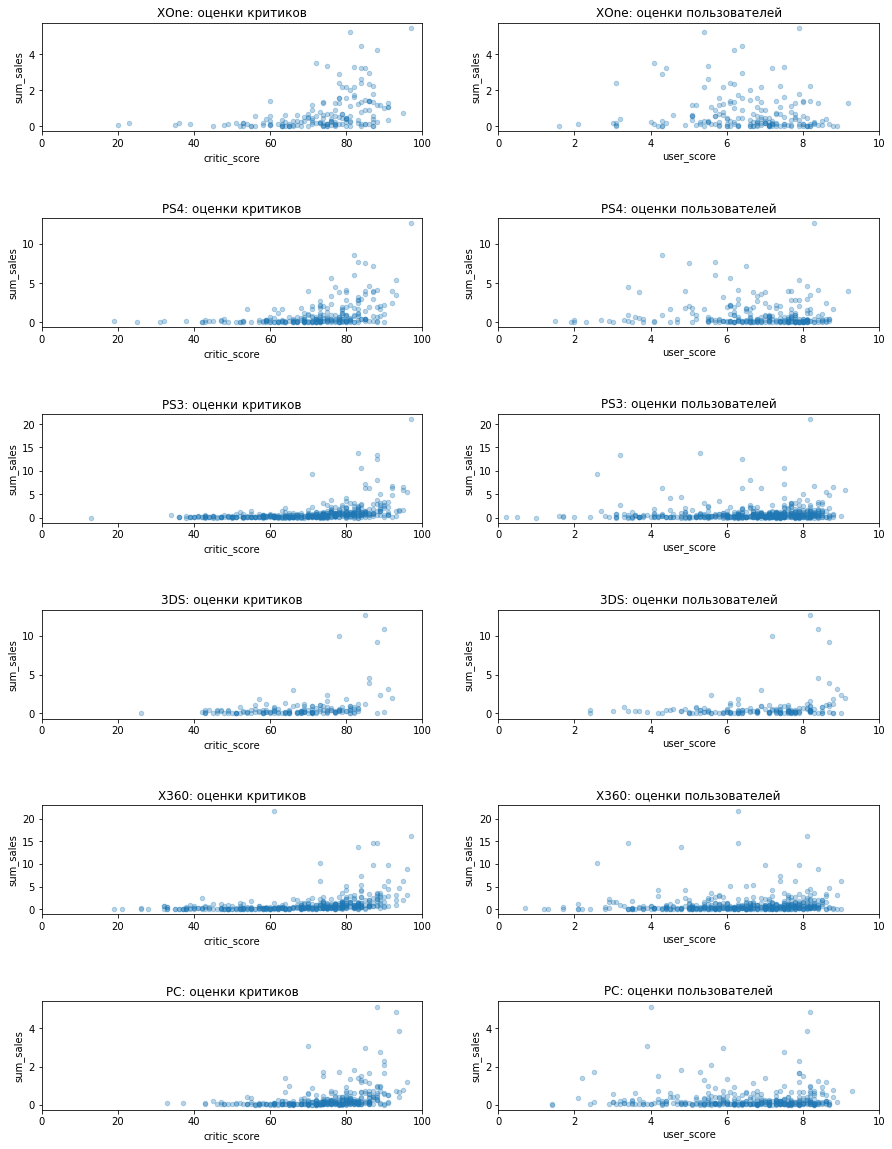

In [34]:
fig, axes = plt.subplots(len(platform_list), 2, figsize=(15, 20))
plt.subplots_adjust(hspace=.8)
for i in range(len(platform_list)):
    pf = platform_list[i]
    data_actual[data_actual['platform'] == pf].plot(
        kind='scatter', 
        y='sum_sales', 
        x='critic_score',
        alpha=0.3,
        ax=axes[i, 0]
    )
    data_actual[data_actual['platform'] == pf].plot(
        kind='scatter', 
        y='sum_sales', 
        x='user_score',
        alpha=0.3,
        ax=axes[i, 1]
    )    
    axes[i, 0].set(title = pf+': оценки критиков', xlim=(0, 100))
    axes[i, 1].set(title = pf+': оценки пользователей', xlim=(0, 10))


In [35]:
print('Коррелляция между продажами и оценками')
for pf in platform_list:
    print(pf)
    print('Коррелляция c оценками критиков: \t', 
          round(data_actual[data_actual['platform'] == pf]['sum_sales'].corr(data_actual[data_actual['platform'] == pf]['critic_score']), 3))
    print('Коррелляция c оценками пользователей: \t', 
          round(data_actual[data_actual['platform'] == pf]['sum_sales'].corr(data_actual[data_actual['platform'] == pf]['user_score']), 3))
    print()

Коррелляция между продажами и оценками
XOne
Коррелляция c оценками критиков: 	 0.417
Коррелляция c оценками пользователей: 	 -0.069

PS4
Коррелляция c оценками критиков: 	 0.407
Коррелляция c оценками пользователей: 	 -0.032

PS3
Коррелляция c оценками критиков: 	 0.401
Коррелляция c оценками пользователей: 	 0.065

3DS
Коррелляция c оценками критиков: 	 0.349
Коррелляция c оценками пользователей: 	 0.222

X360
Коррелляция c оценками критиков: 	 0.34
Коррелляция c оценками пользователей: 	 0.066

PC
Коррелляция c оценками критиков: 	 0.336
Коррелляция c оценками пользователей: 	 -0.011



## Шаг 3.7 Вывод
В общем коррелляция между оценками критиков и продаж есть, но слабая. С критикой пользователей коррелляции нет, кроме 3DS, у которой есть слабая коррелляция.

<hr>

## Шаг 3.8 Анализ жанров


In [36]:
func_columns = ['sum', 'count', 'mean', 'median']
genre_data = data_actual.pivot_table(index='genre', values='sum_sales', aggfunc=func_columns)
genre_data.columns = func_columns
cm = sns.light_palette("green", as_cmap=True)
#Сортировка по сумме продаж
s = genre_data.sort_values('sum').style.background_gradient(cmap=cm)
s

,sum,count,mean,median
genre,,,,
Puzzle,6.28,37,0.16973,0.06
Strategy,25.05,108,0.231944,0.075
Adventure,39.55,208,0.190144,0.06
Simulation,57.88,134,0.43194,0.125
Platform,59.18,84,0.704524,0.19
Fighting,65.65,140,0.468929,0.245
Racing,102.9,183,0.562295,0.17
Misc,108.4,250,0.4336,0.13
Role-Playing,240.01,334,0.718593,0.21


In [37]:
#Сортировка по медиане
s = genre_data.sort_values('median').style.background_gradient(cmap=cm)
s

,sum,count,mean,median
genre,,,,
Adventure,39.55,208,0.190144,0.06
Puzzle,6.28,37,0.16973,0.06
Strategy,25.05,108,0.231944,0.075
Simulation,57.88,134,0.43194,0.125
Misc,108.4,250,0.4336,0.13
Racing,102.9,183,0.562295,0.17
Action,554.75,984,0.56377,0.19
Platform,59.18,84,0.704524,0.19
Role-Playing,240.01,334,0.718593,0.21


## Шаг 3.8 Вывод
Очевидно, что чем больше выпущенных игр на платформу, тем больше продаж.<br>
Жанры Shooter и Action сильно опережают остальные. При этом хоть Shooter на втором месте по суммарным продаже, по медианным и средним продажам он на первом.<br>
Puzzle имеют совсем маленькие проажи. Adventure тоже слабо продавались, несмотря на то, что по количеству выпущенных игр не в самом конце.

<hr>

# Шаг 4 Портрет пользователей по регионам



## Шаг 4.1 Продажи по платформам

In [38]:
region_pf_data = data_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
s = region_pf_data.sort_values('eu_sales').style.background_gradient(cmap=cm)
s

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
XOne,51.59,0.34,93.12,14.27
3DS,61.27,100.62,82.65,13.27
PC,68.82,0,39.07,14.07
PS4,141.09,15.96,108.74,48.35
X360,163.41,5.46,334.18,47.36
PS3,213.6,59.26,229.25,85.63


<hr>

## Шаг 4.2 Продажи по жанрам

In [39]:
region_genre_data = data_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
s = region_genre_data.sort_values('eu_sales').style.background_gradient(cmap=cm)
s

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Puzzle,2.66,1.84,1.36,0.42
Strategy,10.97,2.02,9.32,2.74
Adventure,14.46,5.57,15.13,4.39
Fighting,17.06,9.44,32.32,6.83
Platform,20.8,7.2,25.29,5.89
Simulation,23.97,11.59,17.66,4.66
Misc,29.07,7.61,61.42,10.3
Racing,48.11,5.16,36.44,13.19
Role-Playing,66.44,58.93,93.93,20.71


<hr>

## Шаг 4.3 Продажи по возрастному рейтингу
Для справки: <br>
«EC» («Early childhood») — «Для детей младшего возраста» <br>
«E» («Everyone») — «Для всех» <br>
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» <br>
«T» («Teen») — «Подросткам» <br>
«M» («Mature») — «Для взрослых» <br>
«AO» («Adults Only 18+») — «Только для взрослых» <br>
«RP» («Rating Pending») — «Рейтинг ожидается» <br>

In [40]:
region_rating_data = data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
s = region_rating_data.sort_values('eu_sales').style.background_gradient(cmap=cm)
s

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
EC,0,0,0.09,0
RP,0.03,0,0,0.01
E10+,56.89,6.02,86.9,18.87
T,100.03,28.79,134.24,33.38
E,147.47,28.37,179.62,44.64
M,286.03,27.51,373.44,94.03


## Шаг 4 Вывод

**Европа**: <br>
Платформы: PS3, PS4, X360<br>
Жанры: Sports, Shooter, Action<br>
Рейтинги: M, E, T <br>
<br>
**Япония**: <br>
Платформы: PS3, PS4, 3DS<br>
Жанры: Role-Playing, Shooter, Action<br>
Рейтинги: M, E, T <br>
<br>
**Северная Америка**: <br>
Платформы: PS3, PS4, X360<br>
Жанры: Sports, Shooter, Action<br>
Рейтинги: M, E, T <br>
<br>
**Остальные регионы**: <br>
Платформы: PS3, PS4, X360<br>
Жанры: Sports, Shooter, Action<br>
Рейтинги: M, E, T <br>
<br>
В общем, только япония сильно отличается от других по жанру и платформам. Видимо Япония предпочитает PS3 и PS4 из-за того, что производитель платформы их компания Sony, а Северная Америка - X360,  потому что производитель Microsoft. Другие регионы склоняются к PS3, но не с таким сильным отрывом от X360.

<hr>

# Шаг 5 Проверка гипотез



In [41]:
# Функция вывода информации по таблицам
def print_var_mean(*series):
    for s in series:
        print(s._title, '\n', 'Дисперсия:', np.var(s), '\t Среднее:', np.mean(s), '\n')

## Шаг 5.1 Пользовательские рейтинги платформ Xbox One и PC 
H<sub>0</sub> - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [42]:
user_score_pc = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()
# Зададим название таблица для вывода в функции
user_score_pc._title = 'PC'
user_score_xone = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna()
# Зададим название таблица для вывода в функции
user_score_xone._title = 'XOne'
print_var_mean(user_score_pc, user_score_xone)

PC 
 Дисперсия: 2.4438940204180843 	 Среднее: 6.5181818181818185 

XOne 
 Дисперсия: 1.8965188383045526 	 Среднее: 6.521428571428572 



In [43]:
alpha = .05 # выбираем стандартное значение
results = st.ttest_ind(
    user_score_pc, 
    user_score_xone,
    equal_var=False # Так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


## Шаг 5.1 Вывод
Нулевая гипотеза не отвергнута, значит средние пользовательские рейтинги платформ XOne и PC одинаковые

<hr>

## Шаг 5.2 Средние пользовательские рейтинги жанров Action и Sports
H<sub>0</sub> - Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [44]:
user_score_action = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
# Зададим название таблица для вывода в функции
user_score_action._title = 'Action'
user_score_sports = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()
# Зададим название таблица для вывода в функции
user_score_sports._title = 'Sports'
print_var_mean(user_score_action, user_score_sports)

Action 
 Дисперсия: 1.8086115220249837 	 Среднее: 6.746794871794871 

Sports 
 Дисперсия: 2.8045173415836575 	 Среднее: 5.768441064638783 



In [45]:
alpha = .05 # выбираем стандартное значение
results = st.ttest_ind(
    user_score_action, 
    user_score_sports,
    equal_var=False # Так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.079827060791015e-16
Отвергаем нулевую гипотезу


## Шаг 5.2 Вывод
Нулевая гипотеза отвергнута, значит средние пользовательские рейтинги жанров Action и Sports отличаются

<hr>

# Шаг 6 Выводы

В Японии стледует делать упор на игры жанра Role-play и Action на платформы PS4, PS3, 3DS. <br>
В Северной Америке на жанры Action, Shooter и Sports на платформы XOne, X360 <br>
В остальных регионах жанры Action, Shooter и Sports, но платформы можно выбрать X360, PS3, т.е. можно сказать, что пользователи почти в равной степени предпочитают обе платформы, в то время как Япония и Сев.Америка больше поддерживают своих отечественных производителей.<br>
Также стоит учесть, что на консоли предпоследнего поколения (PS3, X360) уже почти ничего не покупают, поэтому ставку стоит делать на PS4 и XOne.<br>
Небольшую рекламную кампанию можно сделать на PC во всех регионах, т.к. это платформа хоть и не вырывается, но стабильно держится. 
<hr>

**Рекомендации к файлу датасета**: <br>
Имеются много пропусков в рейтингах, оценках критиков и пользователей, хотя в интернете на различных сайтах (wiki, Metacritic) информация есть, поэтому стоит обновить информацию. (возможно на момент сбора инфы в 2016 году этих данных действительно не было)

In [47]:
import pandas as pd

d = {'value': [1, 2, 5, 3, 2, 5], 'wd': [1, 3, 5, 1, 3, 5]}
data = pd.DataFrame(d)
data.groupby('wd')['value'].mean()

wd
1    2
3    2
5    5
Name: value, dtype: int64